# Graphics and Visualization with Matplotlib


### Install and import package

In [ ]:
!pip install matplotlib

In [2]:
import matplotlib.pyplot as plt
import numpy as np

from PIL import Image


## --- 2D Visualization ---

Three types that are especially useful in physics: 
- ordinary line graphs
- scatter plots
- image plots

### Example 1 - Line graphs

A. Simple graph

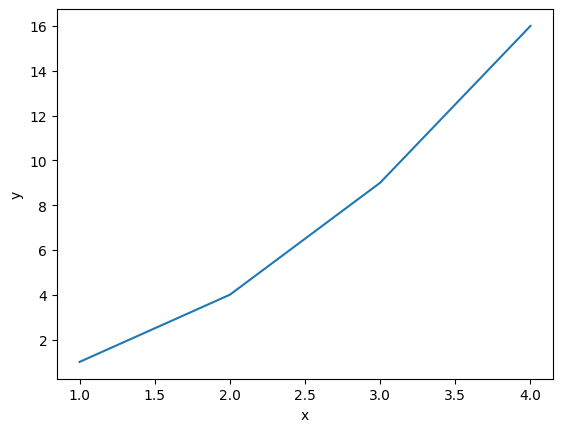

In [3]:
# set up data x and y
x = [1, 2, 3, 4]
y = [1, 4, 9, 16]

# configure and setup plot
plt.plot(x, y)
plt.xlabel('x')
plt.ylabel('y')

# plot data
plt.show()

### Anatomy of Figure object

<div>
<img src="anatomy.webp" width="500"/>
</div>

B. Multiple graphs on one plot

0.5 14.0


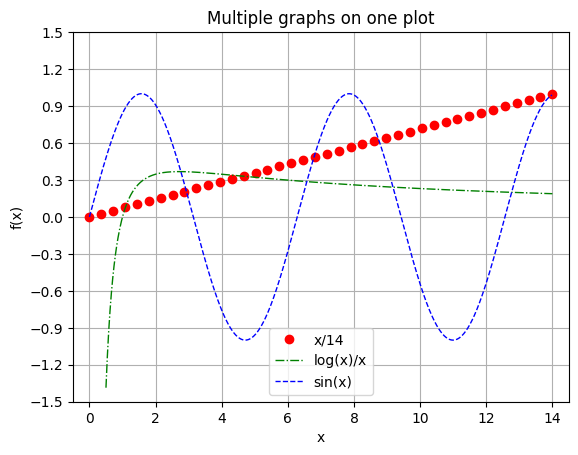

In [8]:
# Configure the figure
fig2, ax = plt.subplots()  
ax.set_title("Multiple graphs on one plot")
ax.set_xlabel("x")
ax.set_ylabel("f(x)")
ax.set_xlim([-0.5,14.5])
ax.set_ylim([-1.5,1.5])

# Setup the grid
xticks = [2*i for i in range(8)]
ax.set_xticks(xticks)
yticks = [3*i/10-1.5 for i in range(11)]
ax.set_yticks(yticks)
ax.grid(which='both')

# First graph
x = np.linspace(0, 14, 40)
y = x/14
ax.plot(x,y, 'o', label='x/14', color='red', linewidth=1)

# Second graph
x = np.linspace(0.5, 14, 1000) 
y = np.log(x)/x
print(x[0], x[-1])
ax.plot(x,y, label='log(x)/x', color='green', linewidth=1, linestyle='-.')

# Third graph
x = [0.01*i for i in range(1400)]
y = np.sin(x)
ax.plot(x,y, label='sin(x)', color='blue', linewidth=1, linestyle='--')

# Add graph's legend
ax.legend()

plt.show()

C. Multiple subplots

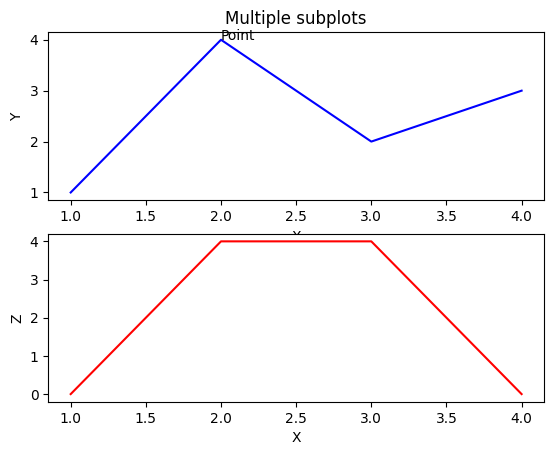

In [11]:
# Create a figure containing two Axes.
fig, ax = plt.subplots(2,1)           
ax[0].set_title("Multiple subplots")

# Configure Axes 0
ax[0].plot([1, 2, 3, 4], [1, 4, 2, 3], 'b')  
ax[0].set_xlabel("X")
ax[0].set_ylabel("Y")
ax[0].text(2,4, "Point")

# Configure Axes 1
ax[1].plot([1, 2, 3, 4], [0, 4, 4, 0], 'r')  
ax[1].set_xlabel("X")
ax[1].set_ylabel("Z")

plt.show() 

### Example 2 - Scatter Plot

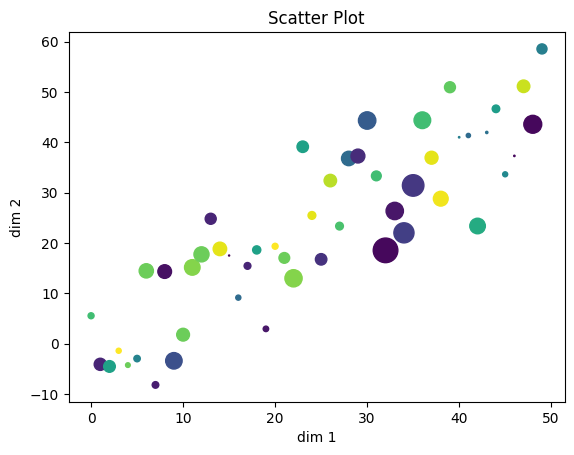

In [7]:
data = {'a': np.arange(50),
        'c': np.random.randint(0, 50, 50),
        'd': np.random.randn(50)}
data['b'] = data['a'] + 10 * np.random.randn(50)
data['d'] = np.abs(data['d']) * 100

plt.title('Scatter Plot')
plt.scatter('a', 'b', c='c', s='d', data=data, marker='o')
plt.xlabel('dim 1')
plt.ylabel('dim 2')
plt.show()

### Example 3 - Bar Chart

Source: https://matplotlib.org/stable/tutorials/lifecycle.html#sphx-glr-tutorials-lifecycle-pya 

In [14]:
data = {'Barton LLC': 109438.50,
        'Frami, Hills and Schmidt': 103569.59,
        'Fritsch, Russel and Anderson': 112214.71,
        'Jerde-Hilpert': 112591.43,
        'Keeling LLC': 100934.30,
        'Koepp Ltd': 103660.54,
        'Kulas Inc': 137351.96,
        'Trantow-Barrows': 123381.38,
        'White-Trantow': 135841.99,
        'Will LLC': 104437.60}
group_data = list(data.values())
group_names = list(data.keys())
group_mean = np.mean(group_data)

In [19]:
# Configure the styling and global params
print(plt.style.available)
plt.rcParams.update({'figure.autolayout': True})
plt.style.use('_mpl-gallery')

['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'petroff10', 'seaborn-v0_8', 'seaborn-v0_8-bright', 'seaborn-v0_8-colorblind', 'seaborn-v0_8-dark', 'seaborn-v0_8-dark-palette', 'seaborn-v0_8-darkgrid', 'seaborn-v0_8-deep', 'seaborn-v0_8-muted', 'seaborn-v0_8-notebook', 'seaborn-v0_8-paper', 'seaborn-v0_8-pastel', 'seaborn-v0_8-poster', 'seaborn-v0_8-talk', 'seaborn-v0_8-ticks', 'seaborn-v0_8-white', 'seaborn-v0_8-whitegrid', 'tableau-colorblind10']


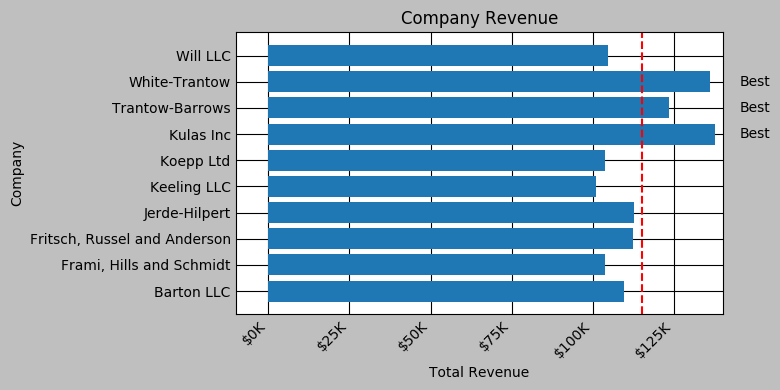

In [22]:
fig, ax = plt.subplots(figsize=(8, 4))  # create a plot
ax.barh(group_names, group_data)        # data
ax.set_xlim([-10000, 140000])
ax.set_xlabel('Total Revenue')
ax.set_ylabel('Company')
ax.set_title('Company Revenue')

# Add a vertical line, here we set the style in the function call
ax.axvline(115000, ls='--', color='r')

# Annotate new companies
for idx in range(len(group_data)):
    group = group_data[idx]
    if group >= 115000:
       ax.text(145000, idx, "Best", fontsize=10,
               verticalalignment="center")

# Now we move our title up since it's getting a little cramped
ax.title.set(y=1.05)

def currency(x, pos):
    """The two arguments are the value and tick position"""
    if x >= 1e6:
        s = f'${x*1e-6:1.1f}M'
    else:
        s = f'${x*1e-3:1.0f}K'
    return s
    
ax.xaxis.set_major_formatter(currency)
ax.set_xticks([0, 25e3, 50e3, 75e3, 100e3, 125e3])

# Fit the horizontal labels
labels = ax.get_xticklabels()
plt.setp(labels, rotation=45, horizontalalignment='right')

fig.subplots_adjust()

plt.show()

# save file
fig.savefig('sales.png', transparent=True, dpi=80, bbox_inches="tight")

### Example 4 - Image Plot

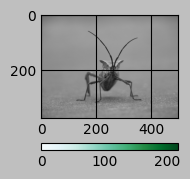

In [24]:
import PIL.Image 

# Import image into numpy array
img = np.asarray(PIL.Image.open('stinkbug.webp'))

# Draw image with colorbar
imgplot = plt.imshow(img, cmap="BuGn")
plt.colorbar(orientation='horizontal')

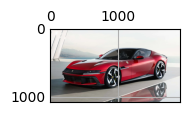

In [13]:
import PIL.Image 

# Import image into numpy array
img = np.asarray(PIL.Image.open('ferrari.webp'))

# Draw image with colorbar
imgplot = plt.imshow(img)
ax = plt.gca() # get current Axes
ax.tick_params(top=True, labeltop=True, bottom=False, labelbottom=False)


## --- 3D Visualization ---

[[-5.   -4.75 -4.5  ...  4.25  4.5   4.75]
 [-5.   -4.75 -4.5  ...  4.25  4.5   4.75]
 [-5.   -4.75 -4.5  ...  4.25  4.5   4.75]
 ...
 [-5.   -4.75 -4.5  ...  4.25  4.5   4.75]
 [-5.   -4.75 -4.5  ...  4.25  4.5   4.75]
 [-5.   -4.75 -4.5  ...  4.25  4.5   4.75]]
[[-10.   -10.   -10.   ... -10.   -10.   -10.  ]
 [ -9.75  -9.75  -9.75 ...  -9.75  -9.75  -9.75]
 [ -9.5   -9.5   -9.5  ...  -9.5   -9.5   -9.5 ]
 ...
 [  9.25   9.25   9.25 ...   9.25   9.25   9.25]
 [  9.5    9.5    9.5  ...   9.5    9.5    9.5 ]
 [  9.75   9.75   9.75 ...   9.75   9.75   9.75]]


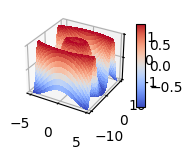

In [14]:
import matplotlib.pyplot as plt
from matplotlib import cm

fig = plt.figure()
ax = fig.add_subplot(projection='3d')

# Prepare a data
X = np.arange(-5, 5, 0.25)
Y = np.arange(-10, 10, 0.25)
X, Y = np.meshgrid(X, Y)
print(X)
print(Y)

R = np.sqrt(X**2 + Y**2)
Z = np.sin(R)

# Plot a surface
surf = ax.plot_surface(X, Y, Z, rstride=1, cstride=1, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)
ax.set_zlim(-1.01, 1.01)
fig.colorbar(surf, shrink=0.5, aspect=10)

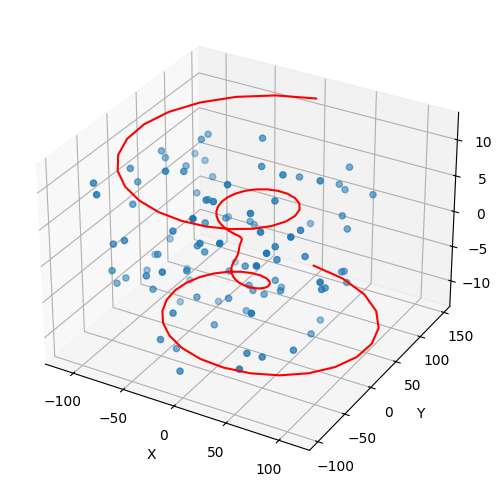

In [15]:
import matplotlib.pyplot as plt
import numpy as np

plt.style.use('_mpl-gallery')

# Make data
np.random.seed(19680801)
n = 100
rng = np.random.default_rng()
xs = rng.uniform(-100, 100, n)
ys = rng.uniform(-100, 100, n)
zs = rng.uniform(-12, 12, n)

# Prepare arrays x, y, z
theta = np.linspace(-4 * np.pi, 4 * np.pi, 100)
z = np.linspace(-12, 12, 100)
r = z**2 + 1
x = r * np.sin(theta)
y = r * np.cos(theta)

# Plot
fig, ax = plt.subplots(subplot_kw={"projection": "3d"}, figsize=(5,8))
ax.scatter(xs, ys, zs)
ax.plot(x, y, z, 'red', label='parametric curve')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.zaxis.set_rotate_label(False) 
ax.set_zlabel('Z', fontsize=20, rotation = 0)

plt.show()

## --- Animation ---

In [29]:

# importing required libraries 
from matplotlib import pyplot as plt 
import numpy as np 
import csv

import matplotlib.animation as animation 
from IPython import display 

# initializing a figure 
fig = plt.figure(figsize=(5,5)) 
  
# labeling the x-axis and y-axis 
axis = plt.axes(xlim=(0, 4),  ylim=(-1.5, 1.5)) 
  
# initializing a line variable 
line, = axis.plot([], [], lw=3) 
  
def animate(frame_number): 
    x = np.linspace(0, 4, 1000) 
  
    # plots a sine graph 
    y = np.sin(2 * np.pi * (x - 0.01 * frame_number)) 
    line.set_data(x, y) 
    line.set_color('green') 
    return line, 
  
  
anim = animation.FuncAnimation(fig, animate, frames=1000,  
                               interval=20, blit=True) 


fig.suptitle('Sine wave plot', fontsize=14) 
  
# converting to an html5 video 
video = anim.to_html5_video() 
  
# embedding for the video 
html = display.HTML(video) 
  
# draw the animation 
display.display(html) 
plt.close() 

In [30]:
# importing required libraries 
from matplotlib import pyplot as plt 
import numpy as np 
import csv

import matplotlib.animation as animation 
from IPython import display 

# Load data
filename = 'data.csv'
with open(filename, newline='') as f:
    reader = csv.reader(f, delimiter='\t')
    data = {}
    i = 0
    for row in reader:
        data[row[0]] = np.asarray(list(map(int, row[1:])))
        print(row[0], data[row[0]])
        i += 1

data_names = list(data.keys())
data_values = np.asarray(list(data.values()))

#print(data_names)
#print(data_values)
    
# initializing a figure 
plt.rcParams["figure.figsize"] = (5,3)
fig, ax = plt.subplots() 

bar = ax.barh([], [], height=0.2)        # data
ax.set_xlim(0,1200)
ax.set_ylim(-0.5,2.5)
ax.set_xlabel("Revenue")

# labeling the x-axis and y-axis 
#axis = plt.axes(xlim=(0, 1000),  ylim=(0, 1000)) 
  
def animate(frame_number): 
    # clear and reser the Axes
    plt.cla()
    ax.set_xlim(0,1200)
    ax.set_ylim(-0.5,2.5)
    ax.set_xlabel("Revenue")

    # Plot data
    bar = ax.barh(data_names[1:][::-1], data_values[1:,frame_number][::-1], color=['r', 'g', 'b'] ) 
    ax.set_title("Year: " + str(data_values[0,frame_number]))
    return bar
  
anim = animation.FuncAnimation(fig, animate, frames=12,  
                               interval=3000, blit=True)

# converting to an html5 video 
video = anim.to_html5_video() 
  
# embedding for the video 
html = display.HTML(video) 
  
# draw the animation 
display.display(html) 

# saving to m4 using ffmpeg writer 
writervideo = animation.FFMpegWriter(fps=60) 
anim.save('trends.mp4', writer=writervideo) 
plt.close() 

Year [1990 1991 1992 1993 1994 1995 1996 1996 1997 1998 1999 2000]
Trend-1 [ 10  15  40  70 100 180 250 200 270 290 400 750]
Trend-2 [ 50 100 300 600 600 600 600 700 700 650 650 650]
Trend-3 [  10   10   20   30   50   80  130  210  340  550  890 1140]
